In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [38]:
train=pd.read_csv(r"C:\Users\asus\Downloads\train.csv")
test=pd.read_csv(r"C:\Users\asus\Downloads\test.csv")

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [10]:
train.shape

(891, 12)

In [11]:
train=train.drop('Name',axis=1)
test=test.drop('Name',axis=1)


In [12]:
def fill_missing(df):
    for var in df.columns:
        if df[var].dtypes==('int64'or'float64'):
            df[var]=df[var].fillna(df[var].median())
        else:
            df[var]=df[var].fillna(df[var].dropna().mode().values[0])
            
            

In [13]:
fill_missing(train)

In [14]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [15]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,B96 B98,S


In [16]:
fill_missing(test)

In [18]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

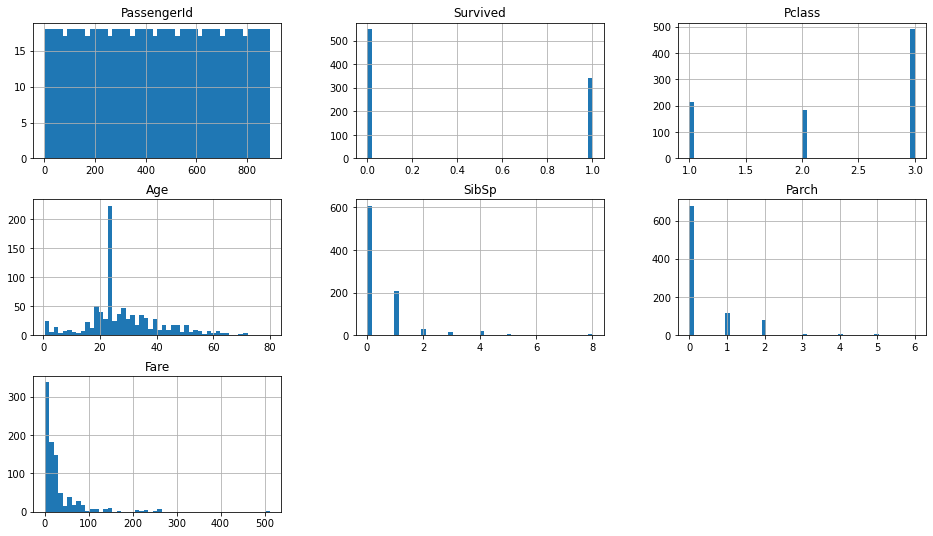

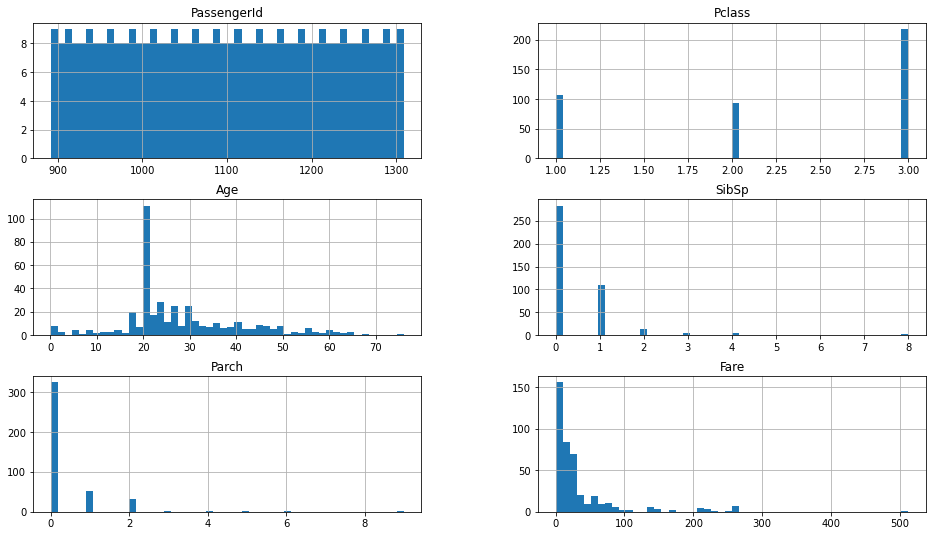

In [21]:
train.hist(bins=50,figsize=(16,9))
test.hist(bins=50,figsize=(16,9))

In [23]:
train=train.drop('Ticket',axis=1)
test=test.drop('Ticket',axis=1)

In [24]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,B96 B98,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,B96 B98,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,B96 B98,S


In [26]:
pd.Categorical(train.Embarked)

['S', 'C', 'S', 'S', 'S', ..., 'S', 'S', 'S', 'C', 'Q']
Length: 891
Categories (3, object): ['C', 'Q', 'S']

In [27]:
pd.Categorical(train.Cabin)

['B96 B98', 'C85', 'B96 B98', 'C123', 'B96 B98', ..., 'B96 B98', 'B42', 'B96 B98', 'C148', 'B96 B98']
Length: 891
Categories (147, object): ['A10', 'A14', 'A16', 'A19', ..., 'F38', 'F4', 'G6', 'T']

In [48]:
train=pd.get_dummies(train,columns=['Sex']) #applied one_hot encoding on the single feature that is Sex

In [49]:
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,1,0,1


In [50]:
pd.Categorical(train['Cabin'])

[NaN, 'C85', NaN, 'C123', NaN, ..., NaN, 'B42', NaN, 'C148', NaN]
Length: 891
Categories (147, object): ['A10', 'A14', 'A16', 'A19', ..., 'F38', 'F4', 'G6', 'T']

In [51]:
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,1,0,1


In [52]:
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,1,0,1


In [53]:
fill_missing(train)

In [54]:
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,B96 B98,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,B96 B98,0,0,1,0,1


In [55]:
train.drop('Name',axis=1,inplace=True)

In [56]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,22.0,1,0,A/5 21171,7.2500,B96 B98,0,0,1,0,1
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,0,0,1,1,0
3,4,1,1,35.0,1,0,113803,53.1000,C123,0,0,1,1,0
4,5,0,3,35.0,0,0,373450,8.0500,B96 B98,0,0,1,0,1


In [57]:
test.drop('Name',axis=1,inplace=True)

In [58]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S


In [59]:
fill_missing(test)

In [61]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [62]:
 test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,330911,7.8292,B57 B59 B63 B66,Q
1,893,3,female,47.0,1,0,363272,7.0000,B57 B59 B63 B66,S
2,894,2,male,62.0,0,0,240276,9.6875,B57 B59 B63 B66,Q
3,895,3,male,27.0,0,0,315154,8.6625,B57 B59 B63 B66,S
4,896,3,female,22.0,1,1,3101298,12.2875,B57 B59 B63 B66,S


In [63]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,22.0,1,0,A/5 21171,7.2500,B96 B98,0,0,1,0,1
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,0,0,1,1,0
3,4,1,1,35.0,1,0,113803,53.1000,C123,0,0,1,1,0
4,5,0,3,35.0,0,0,373450,8.0500,B96 B98,0,0,1,0,1


In [65]:
pd.Categorical(train.Ticket)

['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450', ..., '211536', '112053', 'W./C. 6607', '111369', '370376']
Length: 891
Categories (681, object): ['110152', '110413', '110465', '110564', ..., 'W./C. 6609', 'W.E.P. 5734', 'W/C 14208', 'WE/P 5735']

In [67]:
top_10=train.Ticket.value_counts().sort_values(ascending=False).head(10).keys()

In [68]:
top_10

Index(['1601', 'CA. 2343', '347082', '347088', '3101295', 'CA 2144',
       'S.O.C. 14879', '382652', '113760', '17421'],
      dtype='object')

In [71]:
import numpy as np

In [79]:
def onr_hot_top_10_en(df,variable,top_10):
    for var in top_10:
        df[variable+"_"+var]=np.where(df[variable]==var,1,0)
    

In [80]:
onr_hot_top_10_en(train,"Ticket",top_10)

In [81]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,...,Ticket_1601,Ticket_CA. 2343,Ticket_347082,Ticket_347088,Ticket_3101295,Ticket_CA 2144,Ticket_S.O.C. 14879,Ticket_382652,Ticket_113760,Ticket_17421
0,1,0,3,22.0,1,0,A/5 21171,7.2500,B96 B98,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,1,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,35.0,1,0,113803,53.1000,C123,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,3,35.0,0,0,373450,8.0500,B96 B98,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
onr_hot_top_10_en(test,"Ticket",top_10)

In [83]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_1601,Ticket_CA. 2343,Ticket_347082,Ticket_347088,Ticket_3101295,Ticket_CA 2144,Ticket_S.O.C. 14879,Ticket_382652,Ticket_113760,Ticket_17421
0,892,3,male,34.5,0,0,330911,7.8292,B57 B59 B63 B66,Q,0,0,0,0,0,0,0,0,0,0
1,893,3,female,47.0,1,0,363272,7.0000,B57 B59 B63 B66,S,0,0,0,0,0,0,0,0,0,0
2,894,2,male,62.0,0,0,240276,9.6875,B57 B59 B63 B66,Q,0,0,0,0,0,0,0,0,0,0
3,895,3,male,27.0,0,0,315154,8.6625,B57 B59 B63 B66,S,0,0,0,0,0,0,0,0,0,0
4,896,3,female,22.0,1,1,3101298,12.2875,B57 B59 B63 B66,S,0,0,0,0,0,0,0,0,0,0


In [85]:
train.drop('Ticket',axis=1,inplace=True)
test.drop('Test',axis=1,inplace=True)

KeyError: "['Ticket'] not found in axis"

In [86]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,...,Ticket_1601,Ticket_CA. 2343,Ticket_347082,Ticket_347088,Ticket_3101295,Ticket_CA 2144,Ticket_S.O.C. 14879,Ticket_382652,Ticket_113760,Ticket_17421
0,1,0,3,22.0,1,0,7.2500,B96 B98,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,38.0,1,0,71.2833,C85,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,B96 B98,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,35.0,1,0,53.1000,C123,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,3,35.0,0,0,8.0500,B96 B98,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_1601,Ticket_CA. 2343,Ticket_347082,Ticket_347088,Ticket_3101295,Ticket_CA 2144,Ticket_S.O.C. 14879,Ticket_382652,Ticket_113760,Ticket_17421
0,892,3,male,34.5,0,0,330911,7.8292,B57 B59 B63 B66,Q,0,0,0,0,0,0,0,0,0,0
1,893,3,female,47.0,1,0,363272,7.0000,B57 B59 B63 B66,S,0,0,0,0,0,0,0,0,0,0
2,894,2,male,62.0,0,0,240276,9.6875,B57 B59 B63 B66,Q,0,0,0,0,0,0,0,0,0,0
3,895,3,male,27.0,0,0,315154,8.6625,B57 B59 B63 B66,S,0,0,0,0,0,0,0,0,0,0
4,896,3,female,22.0,1,1,3101298,12.2875,B57 B59 B63 B66,S,0,0,0,0,0,0,0,0,0,0


In [89]:
test.drop('Ticket',axis=1,inplace=True)

In [90]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Ticket_1601,Ticket_CA. 2343,Ticket_347082,Ticket_347088,Ticket_3101295,Ticket_CA 2144,Ticket_S.O.C. 14879,Ticket_382652,Ticket_113760,Ticket_17421
0,892,3,male,34.5,0,0,7.8292,B57 B59 B63 B66,Q,0,0,0,0,0,0,0,0,0,0
1,893,3,female,47.0,1,0,7.0000,B57 B59 B63 B66,S,0,0,0,0,0,0,0,0,0,0
2,894,2,male,62.0,0,0,9.6875,B57 B59 B63 B66,Q,0,0,0,0,0,0,0,0,0,0
3,895,3,male,27.0,0,0,8.6625,B57 B59 B63 B66,S,0,0,0,0,0,0,0,0,0,0
4,896,3,female,22.0,1,1,12.2875,B57 B59 B63 B66,S,0,0,0,0,0,0,0,0,0,0


In [91]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,...,Ticket_1601,Ticket_CA. 2343,Ticket_347082,Ticket_347088,Ticket_3101295,Ticket_CA 2144,Ticket_S.O.C. 14879,Ticket_382652,Ticket_113760,Ticket_17421
0,1,0,3,22.0,1,0,7.2500,B96 B98,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,38.0,1,0,71.2833,C85,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,B96 B98,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,35.0,1,0,53.1000,C123,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,3,35.0,0,0,8.0500,B96 B98,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
pd.Categorical(train.Cabin)

['B96 B98', 'C85', 'B96 B98', 'C123', 'B96 B98', ..., 'B96 B98', 'B42', 'B96 B98', 'C148', 'B96 B98']
Length: 891
Categories (147, object): ['A10', 'A14', 'A16', 'A19', ..., 'F38', 'F4', 'G6', 'T']

In [96]:
top_5=train.Cabin.value_counts().head().sort_values(ascending=False).keys()

In [97]:
def encoding_top_5(df,variable,top_5):
    for var in top_5:
        df[var+"_"+var]=np.where(df[variable]==var,1,0)

In [98]:
encoding_top_5(train,"Cabin",top_5)

In [103]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,...,Ticket_CA 2144,Ticket_S.O.C. 14879,Ticket_382652,Ticket_113760,Ticket_17421,B96 B98_B96 B98,C23 C25 C27_C23 C25 C27,G6_G6,F33_F33,C22 C26_C22 C26
0,1,0,3,22.0,1,0,7.2500,B96 B98,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,1,1,38.0,1,0,71.2833,C85,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,B96 B98,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,1,1,35.0,1,0,53.1000,C123,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,3,35.0,0,0,8.0500,B96 B98,0,0,...,0,0,0,0,0,1,0,0,0,0


In [101]:
train.shape

(891, 38)

In [104]:
encoding_top_5(test,"Cabin",top_5)

In [105]:
test.drop('Cabin',axis=1,inplace=True)

In [107]:
train.drop('Cabin',axis=1,inplace=True)

In [108]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket_1601,Ticket_CA. 2343,...,Ticket_CA 2144,Ticket_S.O.C. 14879,Ticket_382652,Ticket_113760,Ticket_17421,B96 B98_B96 B98,C23 C25 C27_C23 C25 C27,G6_G6,F33_F33,C22 C26_C22 C26
0,892,3,male,34.5,0,0,7.8292,Q,0,0,...,0,0,0,0,0,0,0,0,0,0
1,893,3,female,47.0,1,0,7.0000,S,0,0,...,0,0,0,0,0,0,0,0,0,0
2,894,2,male,62.0,0,0,9.6875,Q,0,0,...,0,0,0,0,0,0,0,0,0,0
3,895,3,male,27.0,0,0,8.6625,S,0,0,...,0,0,0,0,0,0,0,0,0,0
4,896,3,female,22.0,1,1,12.2875,S,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
test.drop('Embarked',axis=1,inplace=True)

In [110]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Ticket_1601,Ticket_CA. 2343,Ticket_347082,...,Ticket_CA 2144,Ticket_S.O.C. 14879,Ticket_382652,Ticket_113760,Ticket_17421,B96 B98_B96 B98,C23 C25 C27_C23 C25 C27,G6_G6,F33_F33,C22 C26_C22 C26
0,892,3,male,34.5,0,0,7.8292,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,893,3,female,47.0,1,0,7.0000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,894,2,male,62.0,0,0,9.6875,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,895,3,male,27.0,0,0,8.6625,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,896,3,female,22.0,1,1,12.2875,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,...,Ticket_CA 2144,Ticket_S.O.C. 14879,Ticket_382652,Ticket_113760,Ticket_17421,B96 B98_B96 B98,C23 C25 C27_C23 C25 C27,G6_G6,F33_F33,C22 C26_C22 C26
0,1,0,3,22.0,1,0,7.2500,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,2,1,1,38.0,1,0,71.2833,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,0,3,35.0,0,0,8.0500,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [113]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [114]:
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,...,Ticket_CA 2144,Ticket_S.O.C. 14879,Ticket_382652,Ticket_113760,Ticket_17421,B96 B98_B96 B98,C23 C25 C27_C23 C25 C27,G6_G6,F33_F33,C22 C26_C22 C26
0,1,3,22.0,1,0,7.2500,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,2,1,38.0,1,0,71.2833,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
3,4,1,35.0,1,0,53.1000,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,5,3,35.0,0,0,8.0500,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [115]:
from sklearn.model_selection import train_test_split

In [119]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [120]:
print("Size of X_train : ",X_train.shape)
print("Size of X_test : ",X_test.shape)
print("Size of y_train : ",y_train.shape)
print("Size of y_test : ",y_test.shape)


Size of X_train :  (712, 36)
Size of X_test :  (179, 36)
Size of y_train :  (712,)
Size of y_test :  (179,)


In [121]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Ticket_1601,Ticket_CA. 2343,Ticket_347082,...,Ticket_CA 2144,Ticket_S.O.C. 14879,Ticket_382652,Ticket_113760,Ticket_17421,B96 B98_B96 B98,C23 C25 C27_C23 C25 C27,G6_G6,F33_F33,C22 C26_C22 C26
0,892,3,male,34.5,0,0,7.8292,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,893,3,female,47.0,1,0,7.0000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,894,2,male,62.0,0,0,9.6875,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,895,3,male,27.0,0,0,8.6625,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,896,3,female,22.0,1,1,12.2875,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
test=pd.get_dummies(test,columns=['Sex'])

In [127]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Ticket_1601,Ticket_CA. 2343,Ticket_347082,Ticket_347088,...,Ticket_382652,Ticket_113760,Ticket_17421,B96 B98_B96 B98,C23 C25 C27_C23 C25 C27,G6_G6,F33_F33,C22 C26_C22 C26,Sex_female,Sex_male
0,892,3,34.5,0,0,7.8292,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,893,3,47.0,1,0,7.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,894,2,62.0,0,0,9.6875,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,895,3,27.0,0,0,8.6625,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,896,3,22.0,1,1,12.2875,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [128]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,...,Ticket_CA 2144,Ticket_S.O.C. 14879,Ticket_382652,Ticket_113760,Ticket_17421,B96 B98_B96 B98,C23 C25 C27_C23 C25 C27,G6_G6,F33_F33,C22 C26_C22 C26
0,1,0,3,22.0,1,0,7.2500,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,2,1,1,38.0,1,0,71.2833,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,0,3,35.0,0,0,8.0500,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [129]:
from sklearn.preprocessing import StandardScaler

In [130]:
sc=StandardScaler()

In [135]:
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

In [137]:
X_test_sc

array([[-0.23345226,  0.83830655, -0.52224462, ..., -0.06504853,
        -0.06504853, -0.05307449],
       [-1.44148859,  0.83830655,  0.29506214, ..., -0.06504853,
        -0.06504853, -0.05307449],
       [-0.98944919,  0.83830655, -0.37364339, ..., -0.06504853,
        -0.06504853, -0.05307449],
       ...,
       [ 1.31361363,  0.83830655, -0.37364339, ..., -0.06504853,
        -0.06504853, -0.05307449],
       [ 0.53423535,  0.83830655,  1.33527074, ..., -0.06504853,
        -0.06504853, -0.05307449],
       [-0.4867502 ,  0.83830655, -0.37364339, ..., -0.06504853,
        -0.06504853, -0.05307449]])

In [138]:
# select a model and train it

In [139]:
from sklearn.linear_model import SGDClassifier

In [140]:
sgd=SGDClassifier()

In [144]:
sgd.fit(X_train_sc,y_train)

SGDClassifier()

In [154]:
y_pred=sgd.predict(X_test_sc)

In [149]:
sgd.score(X_test_sc,y_test) # predict the score of algorithm

0.776536312849162

In [151]:
from sklearn.svm import LinearSVC
svm_reg = LinearSVC()
svm_reg.fit(X_train_sc,y_train)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [153]:
svm_reg.score(X_test_sc,y_test)

0.7821229050279329

In [155]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1], dtype=int64)

In [156]:
y_test

395    0
85     1
201    0
542    0
702    0
      ..
840    0
134    0
792    0
592    0
330    1
Name: Survived, Length: 179, dtype: int64

In [158]:
h1=X_test.iloc[0,:]

In [159]:
svm_reg.predict([h1])

array([0], dtype=int64)

In [162]:
h2=X_test.iloc[1,:]

In [163]:
svm_reg.predict([h2])

array([0], dtype=int64)